# Libraries

In [1]:
import pandas as pd
from sklearn.preprocessing import QuantileTransformer, quantile_transform
import matplotlib.pyplot as plt
from pycaret.regression import *
from pycaret.utils import check_metric
from matplotlib import pyplot as plt
import seaborn as sns

# Metric Function

In [2]:
def metrics_func(true_label,prediction):
    lst = []
    lst.append(check_metric(true_label, prediction,'MAE',))
    lst.append(check_metric(true_label, prediction,'MSE'))
    lst.append(check_metric(true_label, prediction,'RMSE'))
    lst.append(check_metric(true_label, prediction,'R2'))
    lst.append(check_metric(true_label,prediction,'RMSLE'))
    lst.append(check_metric(true_label, prediction,'MAPE'))
    return lst

# Data and Model Loading

In [3]:
# Loading Drug Screening Results
drug_screen_Result = pd.read_csv('../../D2GNets/result/unseen_predict.csv')
#Loading Drug Repurposing Results
GBM_Carmustine = pd.read_csv('../../D2GNets/result/GBM_Carmustine_pred.csv')
GBM_Temozolomide = pd.read_csv('../../D2GNets/result/GBM_Temozolomide_pred.csv')

In [4]:
drug_screen_Result

,mol8 mol8 mol8,mol8 mol5 mol4 mol5 mol5,mol5 mol8 mol8 mol8 mol8 mol1 mol8 mol5,mol5 mol5 mol3,mol8 mol8 mol1 mol2 mol5 mol5 mol8,mol7 mol8 mol8 mol8,mol8 mol7 mol8 mol8 mol5 mol1 mol5,mol5 mol5 mol8 mol5,mol8 mol8 mol3 mol8 mol5 mol1,mol4 mol8 mol8 mol8 mol1 mol8 mol1 mol8,mol8 mol5 mol8 mol8 mol4,mol8 mol8 mol8 mol8 mol8 mol3 mol8 mol8,mol3 mol3 mol8 mol5,mol8 mol8 mol8 mol8 mol8 mol4 mol8 mol8,mol8 mol8 mol8 mol8 mol3 mol8 mol8,mol8 mol1 mol1 mol8 mol8 mol4 mol8 mol8,mol4 mol5 mol8 mol8 mol8 mol8 mol8,mol1 mol1 mol8 mol8,mol8 mol8 mol5 mol8 mol1 mol1 mol8,mol8 mol5 mol5 mol8 mol5 mol8 mol5,mol8 mol8 mol7 mol8,mol8 mol5 mol5 mol8 mol1 mol8,mol8 mol8 mol8 mol8 mol1 mol8 mol5 mol5,mol8 mol8 mol3 mol3 mol3 mol3,mol1 mol8 mol1 mol4,mol8 mol4 mol8 mol8 mol1 mol8 mol1 mol8,mol4 mol8 mol1,mol8 mol8 mol1 mol8 mol5 mol1 mol8 mol5,mol1 mol8 mol8 mol1 mol8 mol7,mol1 mol8 mol8 mol4 mol8 mol8 mol1 mol1,mol1 mol8 mol8 mol4 mol5 mol5 mol8,mol8 mol8 mol1 mol8 mol8 mol8,mol8 mol8 mol8 mol1 mol8 mol8 mol4 mol8,mol5 mol5 mol5 mol5 mol8 mol5 mol1,mol8 mol8 mol4 mol8 mol8 mol1 mol1 mol8,mol5 mol8 mol1,mol7 mol8 mol8 mol5 mol1 mol5 mol8,mol8 mol8 mol8 mol1 mol8 mol1 mol8 mol1,mol8 mol8 mol8 mol8 mol1 mol8 mol1 mol8,mol4 mol8 mol8 mol1 mol1 mol8 mol8 mol8,mol5 mol8 mol8 mol4 mol8 mol1,mol8 mol5 mol4 mol5,mol8 mol5 mol8 mol1 mol1 mol8 mol8,mol8 mol6 mol3 mol8,mol3 mol3 mol1 mol5 mol5,mol3 mol8 mol5 mol8 mol8 mol1,mol5 mol2 mol5,mol5 mol5 mol5 mol2 mol5 mol5 mol5,mol4 mol8 mol1 mol1 mol8 mol5 mol1,mol3 mol1 mol8 mol5 mol1,mol5 mol8 mol5 mol5 mol8 mol8,mol1 mol1 mol8 mol4 mol8,mol4 mol8 mol8 mol1 mol8 mol1 mol8 mol1,mol1 mol2 mol5 mol5 mol8 mol1,mol8 mol8 mol3 mol8 mol8 mol8,mol3 mol3 mol3 mol1 mol1 mol8 mol8,mol1 mol8 mol8 mol1 mol8 mol8 mol8 mol5,mol8 mol8 mol4 mol8 mol1 mol1 mol8 mol5,mol1 mol1 mol5 mol8 mol8,mol1 mol1 mol8 mol8 mol4,mol8 mol8 mol8 mol8 mol6 mol3 mol8,mol8 mol8 mol8 mol6 mol3 mol8,mol5 mol8 mol1 mol5 mol8 mol8 mol8 mol8,mol1 mol8 mol5,mol8 mol5 mol8 mol5 mol8 mol8 mol8,mol4 mol8 mol8 mol1 mol1 mol8,mol5 mol1 mol8 mol5 mol1 mol3,mol8 mol8 mol8 mol8 mol8 mol1 mol1 mol8,mol5 mol8 mol1 mol8 mol5 mol8 mol8 mol8,mol8 mol8 mol5 mol1 mol8 mol5 mol8 mol8,mol1 mol8 mol1 mol8 mol1,mol8 mol5 mol1 mol8 mol8 mol8 mol5,mol5 mol5 mol8 mol5 mol8 mol1 mol8 mol1,mol8 mol8 mol5 mol5 mol8 mol8 mol8,mol8 mol8 mol3 mol3 mol8 mol5 mol1 mol5,mol8 mol5 mol8 mol8 mol8 mol8 mol4 mol8,mol8 mol8 mol8 mol1 mol4,mol8 mol8 mol1 mol1 mol8 mol1 mol8 mol1,mol8 mol5 mol8 mol8 mol5 mol5 mol8 mol8,mol8 mol1 mol4,mol8 mol8 mol8 mol5 mol5 mol8 mol5 mol8,mol8 mol1 mol8 mol1 mol8 mol1 mol5 mol5,mol1 mol8 mol5 mol8 mol5,mol1 mol8 mol8 mol5 mol8,mol8 mol8 mol5 mol1 mol8 mol8,mol5 mol4 mol5 mol5 mol1,mol1 mol1 mol8 mol8 mol8 mol1 mol8 mol8,mol3 mol8 mol5 mol8 mol1 mol8,mol8 mol8 mol1 mol4 mol5 mol5 mol8 mol8,mol5 mol8 mol8 mol8 mol8 mol5 mol5 mol5,mol8 mol5 mol5 mol8 mol5 mol8 mol8,mol8 mol3 mol8 mol5 mol1 mol8 mol8,mol1 mol8 mol5 mol1 mol8 mol8 mol8 mol1,mol8 mol4 mol8 mol8 mol8 mol8 mol8,mol8 mol1 mol8 mol8 mol1 mol8 mol8 mol1,mol5 mol5 mol8 mol5 mol8 mol1 mol8,mol5 mol8 mol5 mol5 mol3,mol5 mol1 mol8 mol1 mol8 mol1 mol8 mol8,mol8 mol5 mol2 mol5 mol5 mol5 mol2 mol5,mol8 mol1 mol1 mol8 mol4 mol8 mol8,mol5 mol1 mol8 mol8 mol8 mol8,mol8 mol8 mol8 mol8 mol8 mol7 mol4 mol5,mol5 mol8 mol1 mol5 mol8,mol8 mol8 mol8 mol8 mol8 mol8 mol3,mol8 mol1 mol8 mol8 mol5 mol1 mol8 mol8,mol8 mol8 mol8 mol8 mol8 mol3 mol5,mol1 mol8 mol1 mol8 mol8 mol8 mol5 mol1,mol8 mol1 mol8 mol8 mol4 mol8 mol1 mol8,mol8 mol8 mol1 mol8 mol8 mol5,mol4 mol5 mol8 mol8 mol8,mol8 mol1 mol8 mol1 mol8 mol1,mol8 mol1 mol8 mol8 mol4 mol8 mol5 mol8,mol8 mol6 mol3 mol1,mol1 mol8 mol8 mol5 mol1,mol5 mol5 mol8,mol1 mol8 mol5 mol8 mol8 mol8 mol8 mol8,mol8 mol5 mol8 mol8 mol5 mol1,mol5 mol5 mol5 mol8 mol5 mol1,mol8 mol1 mol8 mol1 mol8 mol8 mol5 mol8,mol8 mol4 mol8 mol1 mol8 mol8,mol8 mol8 mol4 mol5 mol5 mol8,mol5 mol8 mol5 mol8 mol1 mol8 mol5,mol8 mol1 mol8 mol5 mol1 mol8 mol5,mol8 mol8 mol8 mol7 mol8 mol8,mol5 mol5 mol8 mol8

In [5]:
metrics_func(drug_screen_Result['LN_IC50'],drug_screen_Result['Label'])

[2.8572, 10.8379, 3.2921, -0.4284, 1.0027, 1.5768]

In [5]:
info_cols =['TCGA_DESC', 'SAMPLE_ID',
       'DRUG_NAME', 'LN_IC50_t_Real']
    

In [ ]:
metrics = ['MAE','MSE', 'RMSE', 'R2', 'RMSLE', 'MAPE']

# Drug Repurposing Result of Carmustine

In [ ]:
print(metrics)
print(metrics_func(t_pred.LN_IC50, t_pred.Label))

['MAE', 'MSE', 'RMSE', 'R2', 'RMSLE', 'MAPE']
[5.5146, 31.2927, 5.594, -32.9973, 1.3985, 0.8708]


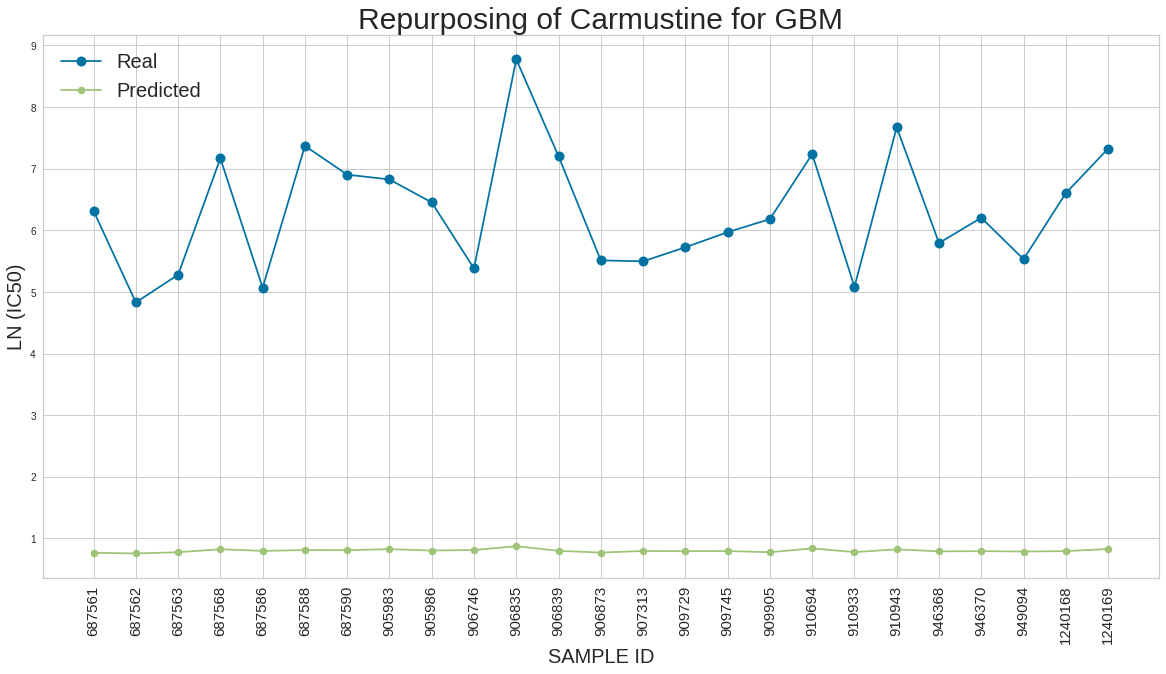

In [11]:
t_predx1 =GBM_Carmustine.copy(deep=True)
t_predx1['SAMPLE_ID'] = t_predx1['SAMPLE_ID'].astype('string')
t_predx1.rename(columns={'LN_IC50':'Real','Label':'Predicted'},inplace=True)
ax = t_predx1.plot.line(y='Real', figsize=(20, 10), rot=90, marker='.',markersize=20,title='Repurposing of Carmustine for GBM')
t_predx1.plot.line(y='Predicted',figsize=(20, 10), ax=ax,rot=90 , marker='.',markersize=15)
ax.set_xticks(t_predx1.index)
ax.set_xticklabels(t_predx1['SAMPLE_ID'],Fontsize=15)
#ax.set_yticklabels(Fontsize=20)
ax.set_xlabel("SAMPLE ID", fontdict={'fontsize':20})
ax.set_ylabel("LN (IC50)",fontdict={'fontsize':20})
ax.legend(loc=2,fontsize=20)
ax.title.set_size(30)
ax.figure.savefig('../../D2GNets/plots/Carmustine_repurposing.pdf')

# Drug Repurposing Result of Temozolomide

In [14]:
print(metrics)
metrics_func(GBM_Temozolomide.LN_IC50, GBM_Temozolomide.Label)

['MAE', 'MSE', 'RMSE', 'R2', 'RMSLE', 'MAPE']


[0.4831, 0.374, 0.6116, 0.5901, 0.089, 0.0809]

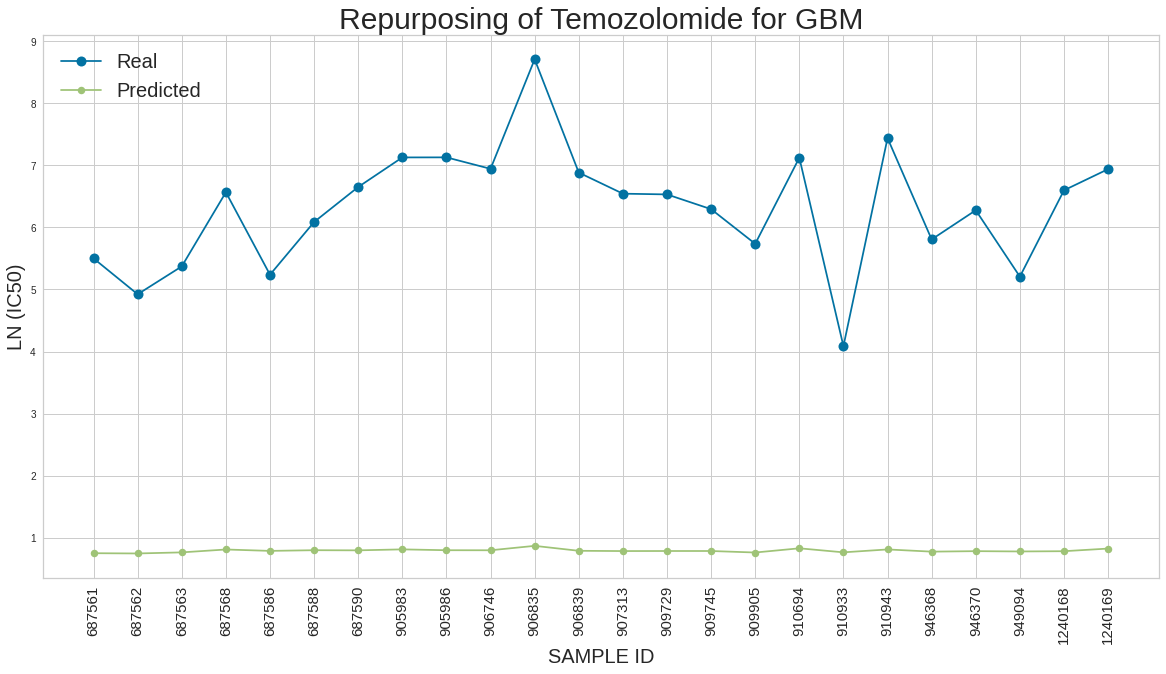

In [12]:
t_predx1 =GBM_Temozolomide.copy(deep=True)
t_predx1['SAMPLE_ID'] = t_predx1['SAMPLE_ID'].astype('string')
t_predx1.rename(columns={'LN_IC50':'Real','Label':'Predicted'},inplace=True)
ax = t_predx1.plot.line(y='Real', figsize=(20, 10), rot=90, marker='.',markersize=20,title='Repurposing of Temozolomide for GBM')
t_predx1.plot.line(y='Predicted',figsize=(20, 10), ax=ax,rot=90 , marker='.',markersize=15)
ax.set_xticks(t_predx1.index)
ax.set_xticklabels(t_predx1['SAMPLE_ID'],Fontsize=15)
#ax.set_yticklabels(Fontsize=20)
ax.set_xlabel("SAMPLE ID", fontdict={'fontsize':20})
ax.set_ylabel("LN (IC50)",fontdict={'fontsize':20})
ax.legend(loc=2,fontsize=20)
ax.title.set_size(30)
ax.figure.savefig('../../D2GNets/plots/Temozolomide_repurposing.pdf')

In [13]:
# saving results in a data frame for both drugs
repurposeRes = [['Carmustine','GBM']+metrics_func(GBM_Carmustine.LN_IC50, GBM_Carmustine.Label),
                ['Temozolomide','GBM']+metrics_func(GBM_Temozolomide.LN_IC50, GBM_Temozolomide.Label)
            ]
repurposeResDF = pd.DataFrame(repurposeRes, columns=['Drug_Name','TCGS_DESC','MAE', 'MSE', 'RMSE','R2','RMSLE','MAPE'])
repurposeResDF.to_csv('../../D2GNets/result/GBM_Repurposing_RESULT_on_scaled_target.csv',index=False)

In [14]:
repurposeResDF

,Drug_Name,TCGS_DESC,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Carmustine,GBM,5.5146,31.2927,5.594,-32.9973,1.3985,0.8708
1,Temozolomide,GBM,5.5267,31.4156,5.605,-33.4277,1.4034,0.8719


# Drug Screening Results

In [21]:
t_pred2 = predict_model(IC50_transformer, data=drug_screen_Result[['LN_IC50','LN_IC50_t']])

In [22]:
print(metrics)
metrics_func(t_pred2.LN_IC50, t_pred2.Label)

['MAE', 'MSE', 'RMSE', 'R2', 'RMSLE', 'MAPE']


[0.8835, 1.3912, 1.1795, 0.8167, 0.3231, 1.7946]

In [23]:
print(metrics)
metrics_func(drug_screen_Result.LN_IC50_t_Real, drug_screen_Result.LN_IC50_t)

['MAE', 'MSE', 'RMSE', 'R2', 'RMSLE', 'MAPE']


[0.051, 0.0047, 0.0682, 0.8034, 0.0456, 0.1222]

In [24]:
t_pred2 =pd.concat([drug_screen_Result[info_cols],t_pred2],axis=1)
t_pred2.rename(columns=col1,inplace=True)
t_pred2.to_csv('../../D2GNets/result/drug_screen_Result_rescaled_LN_IC50.csv',index=False)

# Disease-wise Drug Screening Results

In [25]:
tcga_desc = list(drug_screen_Result['TCGA_DESC'].unique())

In [26]:
screenRes =[['TCGA_DESC','MAE', 'MSE', 'RMSE','R2','RMSLE','MAPE']]
for x in tcga_desc:
    tdf = t_pred2[t_pred2['TCGA_DESC']==x]
    res = metrics_func(tdf.LN_IC50_Real, tdf.LN_IC50_Predicted)
    screenRes.append([x] + res)

In [28]:
screenResDF = pd.DataFrame(screenRes[1:],columns=screenRes[0])

In [29]:
screenResDF.to_csv('../../D2GNets/result/TCGS_DESC_DrugSCREEN_RESULT.csv',index=False)

In [30]:
screenRes =[['TCGA_DESC','MAE', 'MSE', 'RMSE','R2','RMSLE','MAPE']]
for x in tcga_desc:
    tdf = t_pred2[t_pred2['TCGA_DESC']==x]
    res = metrics_func(tdf.LN_IC50_t_Real, tdf.LN_IC50_t_Predicted)
    screenRes.append([x] + res)
screenResDF = pd.DataFrame(screenRes[1:],columns=screenRes[0])
screenResDF.to_csv('../../D2GNets/result/TCGS_DESC_DrugSCREEN_RESULT_on_scaled_target.csv',index=False)

# Other Resutls and observations

### Disease Wise Plots for drug perturbations on samples

In [15]:
cancer = list(drug_screen_Result['TCGA_DESC'].unique())

In [16]:
drug_screen_Result['DRUG_CODE'] = drug_screen_Result['DRUG_NAME'].astype('category').cat.codes

In [ ]:
## following code plots multiple plots uncomment the code to generated the plots
'''
for cname in cancer:
    fig, ax = plt.subplots(constrained_layout=True)
    t_predx1 =drug_screen_Result[drug_screen_Result['TCGA_DESC']==cname].copy(deep=True)
    t_predx1.sort_values(by=['DRUG_CODE'],inplace=True)
    t_predx1.reset_index(inplace=True)
    t_predx1.reset_index(inplace=True)
    t_predx1['SAMPLE_ID'] = t_predx1['SAMPLE_ID'].astype('string')

    t_predx1.rename(columns={'LN_IC50':'Real','Label':'Predicted'},inplace=True)
    t_predx1.plot.line(ax=ax,y='Real', rot=90, marker='.',title=f'Drug Screening for {cname}')
    t_predx1.plot.line(y='Predicted', ax=ax,rot=90 , marker='.')
    t_predx1.plot(y='Predicted',x='level_0',kind='scatter',ax=ax)
    #ax.set_xticks(t_predx1.index)
    #ax.set_xticklabels(t_predx1['SAMPLE_ID'],Fontsize=5)
    #ax.set_yticklabels(Fontsize=20)
    ax.set_xlabel("SAMPLES", fontdict={'fontsize':20})
    ax.set_ylabel("LN (IC50)",fontdict={'fontsize':20})
    ax.legend(loc=2,fontsize=10)
    ax.title.set_size(30)
    #secax = ax.secondary_xaxis('top')
    #secax.set_xticks(t_predx1.DRUG_CODE)
    #secax.set_xticklabels(t_predx1.DRUG_CODE,Fontsize=5,rotation = 90)

    ax.figure.savefig(f'../../D2GNets/plots/{cname}_screening.pdf')
'''

### Box-plot for 'COREAD','NB','LGG','LIHC','BRCA','PRAD','KIRC','ESCA','GBM' cancer Types

In [17]:
cancer_list =['COREAD','NB','LGG','LIHC','BRCA','PRAD','KIRC','ESCA','GBM']

In [18]:
df_lst =[]
for x in cancer_list:
    dft = (drug_screen_Result[drug_screen_Result['TCGA_DESC']==x])[['LN_IC50','Label']]
    tdf = pd.DataFrame(dft.values,columns=[f'{x}-Real',f'{x}-Predicted'])
    df_lst.append(tdf)

new_df = pd.concat(df_lst, axis=1)

In [19]:
c_list = []
pal ={}
for x in cancer_list:
    c_list.append(f'{x}-Real')
    pal.update({f'{x}-Real':'g'})
    c_list.append(f'{x}-Predicted')
    pal.update({f'{x}-Predicted':'b'})

In [44]:
#new_df.to_csv('../../D2GNets/plots/result_comparison_.csv')

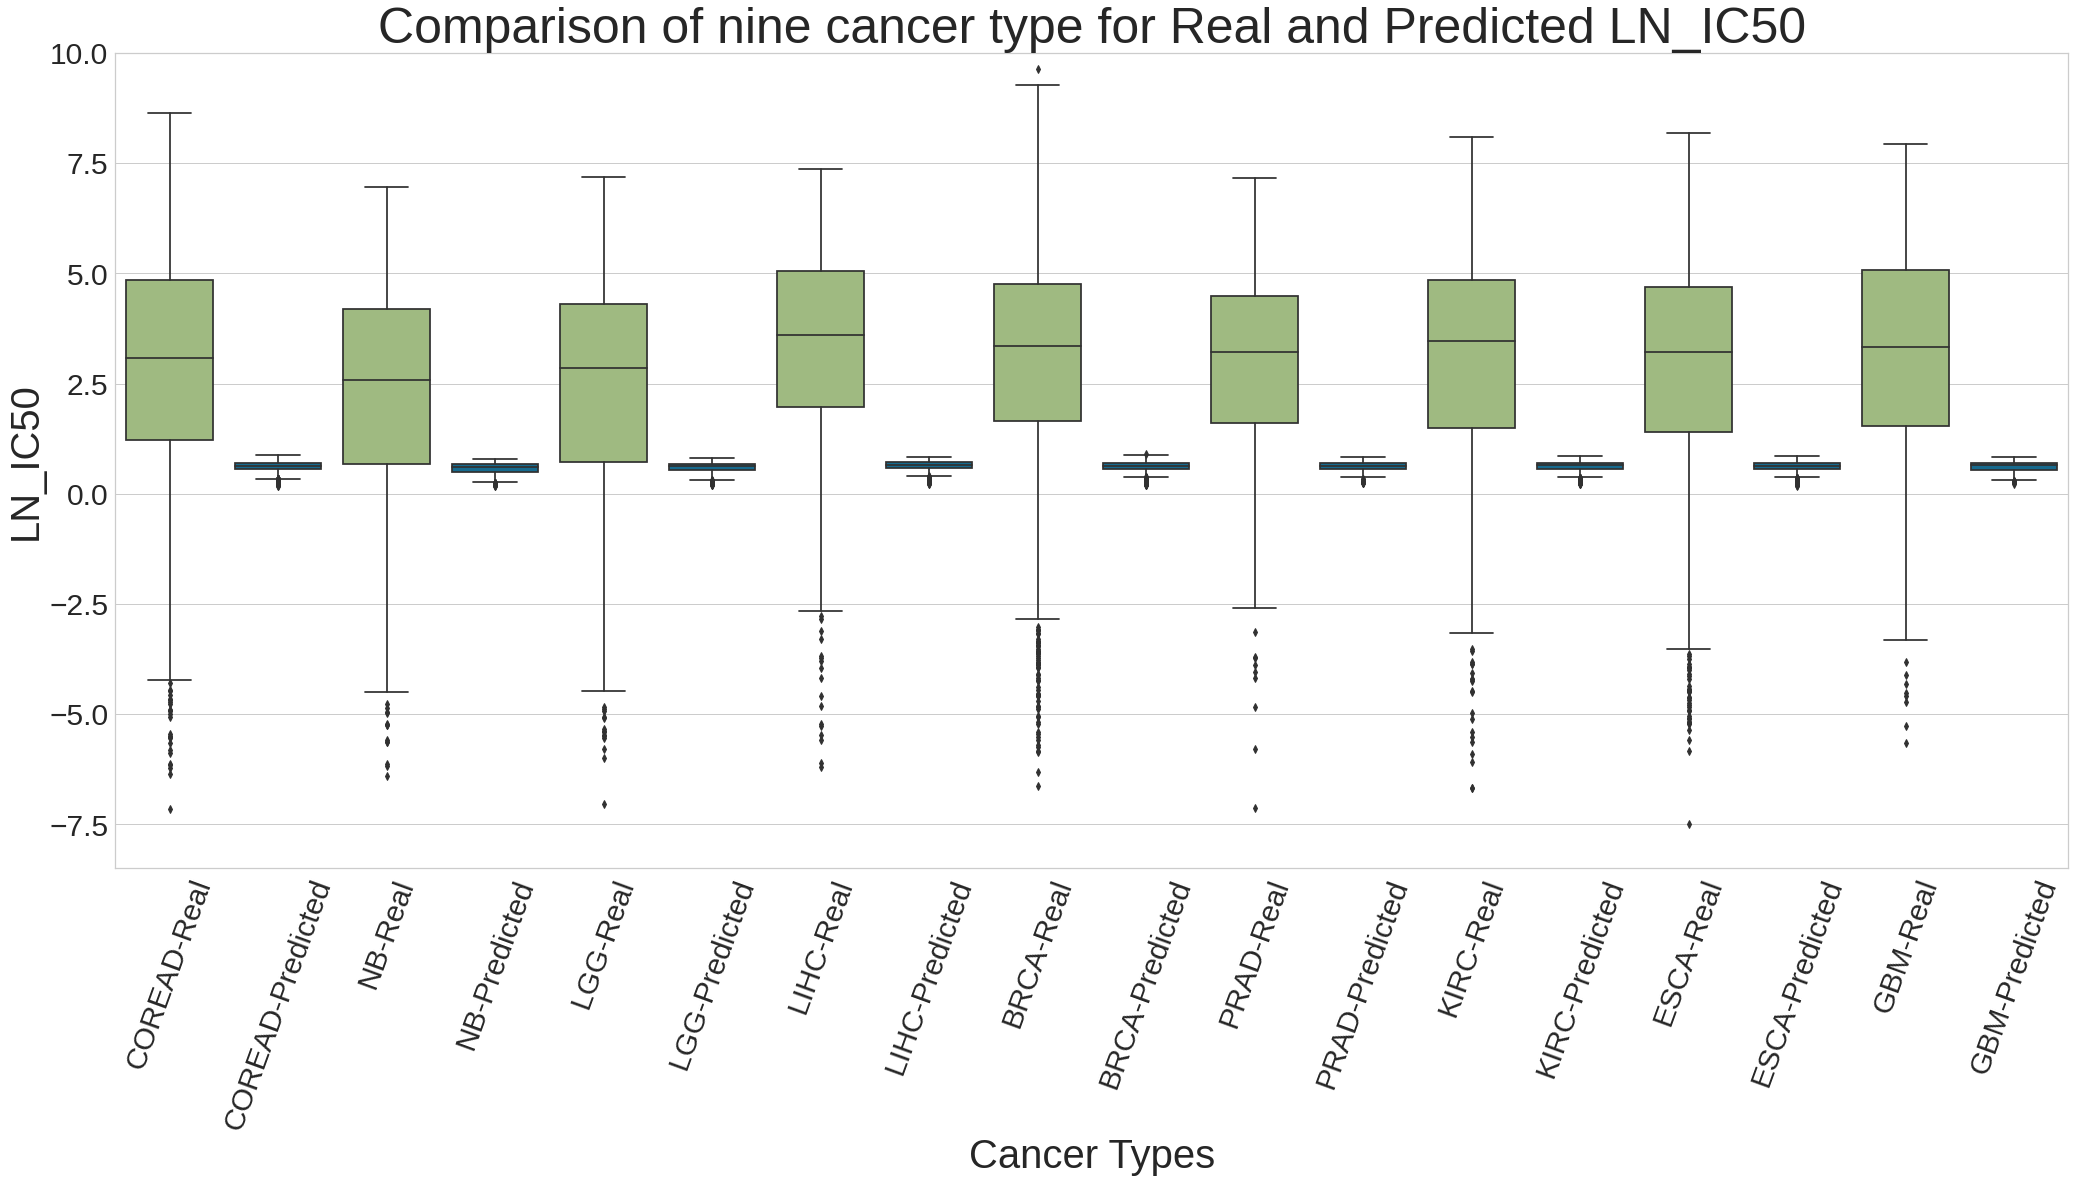

In [20]:
ax = sns.boxplot(data=new_df[c_list], palette=pal)
ax.set_ylabel('LN_IC50',fontsize=40)
ax.set_xlabel('Cancer Types',fontsize=40)
ax.set_title('Comparison of nine cancer type for Real and Predicted LN_IC50',fontsize=50)
ax.set_ylim(-8.5,10)
ax.set_xticklabels(ax.get_xticklabels(),rotation=70)
ax.figure.set_figwidth(35)
ax.figure.set_figheight(15)
ax.tick_params(labelsize=30)
ax.autoscale_view()
ax.figure.savefig(f'../../D2GNets/plots/result_comparison_.pdf')